<a href="https://colab.research.google.com/github/C-3DevO/MORINGA_DS/blob/main/PHASE%200/PHASE_0_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary:Premier League Team Stats Analysis (Opta Data)
This project explores Premier League Teams performance using Opta statistics and applies core Python, pandas, NumPy, Seaborn, and matplotlib skills learned in Moringa School Phase 0.

#Objective:
To extract meaningful insights from Premier League Teams data and  reinforce foundational skills in Python programming, data manipulation, and data visualization.

#Key Goals:
- Understand team performance trends  
- Explore relationships between stats like xG,	xGA	 and xGD towards team position
- Create per-90 and efficiency metrics for deeper evaluation  
- Visualize insights using professional data plots  
- Compare teams across key performance indicators (KPIs)

Tools & Libraries:
- Python 3
- Pandas and NumPy ---> Data manipulation and computation  
- matplotlib and Seaborn ---> Data visualization  
- EDA techniques ---> Statistical summaries and exploration


In [35]:
#importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Phase 1: Setup & Exploration

Goal: Understanding the structure of the data

In [36]:
#Loading the data
data_pl = pd.read_csv("/content/premier_league_stats_2024-25.csv")
data_pl.head() # returned the top 5 teams


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,25,9,4,86,41,45,84,2.21,82.2,38.6,43.6,1.15,60324,Mohamed Salah - 29,Alisson,→ Champions League via league finish
1,2,Arsenal,38,20,14,4,69,34,35,74,1.95,59.9,34.4,25.5,0.67,60251,Kai Havertz - 9,David Raya,→ Champions League via league finish
2,3,Manchester City,38,21,8,9,72,44,28,71,1.87,68.1,47.7,20.4,0.54,52756,Erling Haaland - 22,Ederson,→ Champions League via league finish
3,4,Chelsea,38,20,9,9,64,43,21,69,1.82,67.8,47.3,20.5,0.54,39672,Cole Palmer - 15,Robert Sánchez,→ Champions League via league finish
4,5,Newcastle Utd,38,20,6,12,68,47,21,66,1.74,63.8,45.5,18.3,0.48,52187,Alexander Isak - 23,Nick Pope,→ Europa League via league finish


In [37]:
data_pl.tail() # returned the bottom 5 teams //Manchester not included

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
15,16,Wolves,38,12,6,20,54,69,-15,42,1.11,43.7,58.1,-14.5,-0.38,30695,Matheus Cunha - 15,José Sá,NaN
16,17,Tottenham,38,11,5,22,64,65,-1,38,1.00,58.8,63.3,-4.5,-0.12,61127,Brennan Johnson - 11,Guglielmo Vicario,NaN
17,18,Leicester City,38,6,7,25,33,80,-47,25,0.66,32.6,71.9,-39.3,-1.03,31448,Jamie Vardy - 9,Mads Hermansen,Relegated
18,19,Ipswich Town,38,4,10,24,36,82,-46,22,0.58,34.4,72.7,-38.3,-1.01,29742,Liam Delap - 12,Arijanet Muric,Relegated
19,20,Southampton,38,2,6,30,26,86,-60,12,0.32,32.7,84.8,-52.1,-1.37,30882,Paul Onuachu - 4,Aaron Ramsdale,Relegated


In [38]:
# info about the data
data_pl.info() # the data contain 20 rows and 19 columns/ alternative we could use .shape to get this


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Attendance       20 non-null     int64  
 16  Top Team Scorer  20 non-null     object 
 17  Goalkeeper       2

In [39]:
#checking shape
data_pl.shape

(20, 19)

In [40]:
data_pl.describe()
#Includes measures of central tendency for numerical values

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,10.50000,38.0,14.350000,9.300000,14.350000,55.750000,55.750000,0.000000,52.350000,1.378500,53.905000,53.890000,1.065814e-15,0.001000,40475.550000
std,5.91608,0.0,6.002412,2.867238,6.960603,14.707231,14.421749,27.041878,18.576372,0.488578,13.037617,12.002978,2.329628e+01,0.613033,16886.824694
min,1.00000,38.0,2.000000,5.000000,4.000000,26.000000,34.000000,-60.000000,12.000000,0.320000,32.600000,34.400000,-5.210000e+01,-1.370000,11210.000000
25%,5.75000,38.0,11.000000,7.750000,9.750000,45.500000,45.500000,-11.250000,42.000000,1.110000,45.050000,47.275000,-6.550000e+00,-0.172500,29979.750000
50%,10.50000,38.0,15.000000,9.000000,12.000000,58.000000,52.500000,3.500000,55.000000,1.445000,57.400000,49.600000,2.700000e+00,0.070000,35118.500000
75%,15.25000,38.0,19.250000,10.250000,18.500000,66.000000,62.750000,14.250000,66.000000,1.740000,61.250000,58.500000,1.620000e+01,0.427500,54629.750000
max,20.00000,38.0,25.000000,15.000000,30.000000,86.000000,86.000000,45.000000,84.000000,2.210000,82.200000,84.800000,4.360000e+01,1.150000,73747.000000


2: Data cleaning:
We have 18 columns which do not have null values and the final column(notes) has null values.since it is not important we will replace the null with "No Notes"

In [41]:
data_pl.isnull().mean()*100
#only the column['notes'] has 50% of its values as null

,0
Rk,0.0
Squad,0.0
MP,0.0
W,0.0
D,0.0
L,0.0
GF,0.0
GA,0.0
GD,0.0
Pts,0.0


In [42]:
data_pl['Notes'] = data_pl['Notes'].fillna('No notes')
data_pl_cleaned = data_pl.copy()
data_pl_cleaned.isnull().mean()*100

,0
Rk,0.0
Squad,0.0
MP,0.0
W,0.0
D,0.0
L,0.0
GF,0.0
GA,0.0
GD,0.0
Pts,0.0


In [43]:
#checking the data cleaned now
data_pl_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Attendance       20 non-null     int64  
 16  Top Team Scorer  20 non-null     object 
 17  Goalkeeper       2

No null columns, The columns contain 4 strings(object data type), 5 float type and 10 integer type hence a total of 15 numerical data type.

In [44]:
#let us assign our cleaned data frame to df
df = data_pl_cleaned.copy()
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [45]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

It means there are no duplicate rows in our DataFrame

# **Phase 2: Exploratory Data Analysis (EDA)**
*Goal: Find patterns and compare team performance*


   ***2A: Univariate Analysis***
   
Histogram of GF, GA, Pts, xG, xGA
Top 5 and bottom 5 teams by:
    Goals scored (GF)
    Goals conceded (GA)
    Points (Pts)

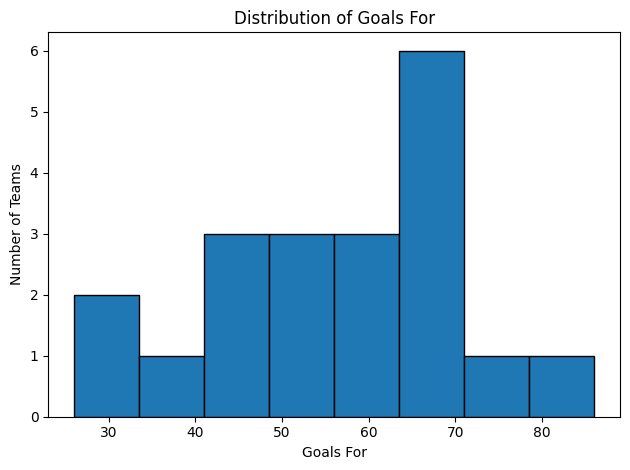

In [46]:
#let us create an histogram of Goals for
plt.hist(df['GF'], bins=8, edgecolor = 'black')
plt.title('Distribution of Goals For')
plt.xlabel('Goals For')
plt.ylabel('Number of Teams')
plt.tight_layout()
plt.show();

Majority of teams have goals for ranging between 41 to 63.5  where our mean and median will likely lie. Also the Goals for is Normally distributed.

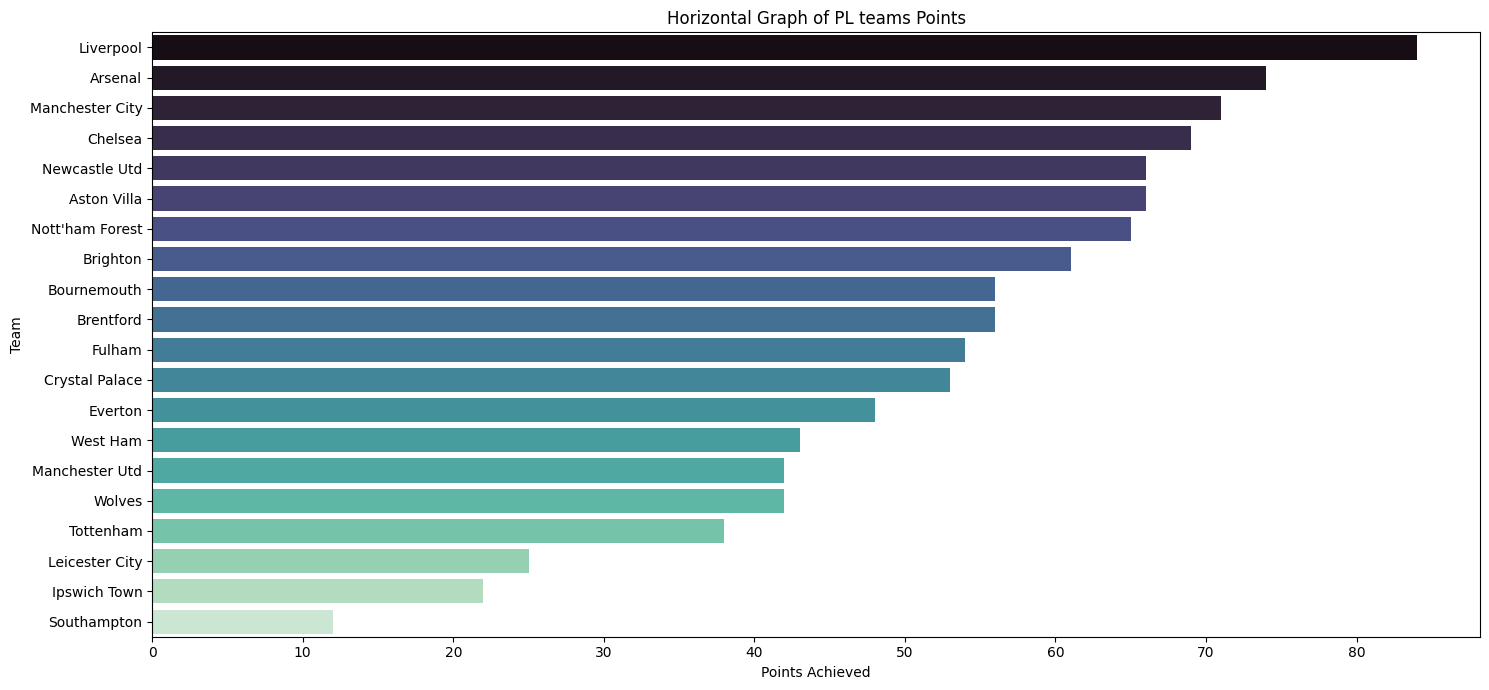

In [47]:
#Let us create an horizontal bar plot for points
plt.figure(figsize = (15,7))
sns.barplot(data=df, x = df['Pts'], y = df['Squad'], hue=df['Squad'], palette = 'mako', orient = 'h')
plt.title('Horizontal Graph of PL teams Points')
plt.xlabel('Points Achieved')
plt.ylabel('Team')
plt.tight_layout()
plt.show();

1.  Liverpool earned the most points — it's at the top with the longest bar.
2.   Arsenal, Man City, and Chelsea closely follow.
2.   Teams are sorted in descending order of points, which makes comparisons easy.
1.   There's a steep drop-off after the top 5–7 teams, showing a performance gap.
4.   The bottom three are way off highlighting that the newly promoted teams did not offer any competition for relegation






In [48]:
# I want to create another column 'Category' to classify the teams as Top 6, Mid-table(with my great Manchester) and Relegation teams
#First I need to create a function to classify the teams

def classify_team(rank):
  if rank <=6:
    return 'Top 6'
  elif rank >=18:
    return 'Relegation Zone'
  else:
    return 'Mid Table'

df['Category'] = df['Rk'].apply(classify_team)
df.shape #Should return 20 columns and 20 rows since we have added the column 'Category'

(20, 20)

Let us now plot the above horizontal bar plot grouped by category

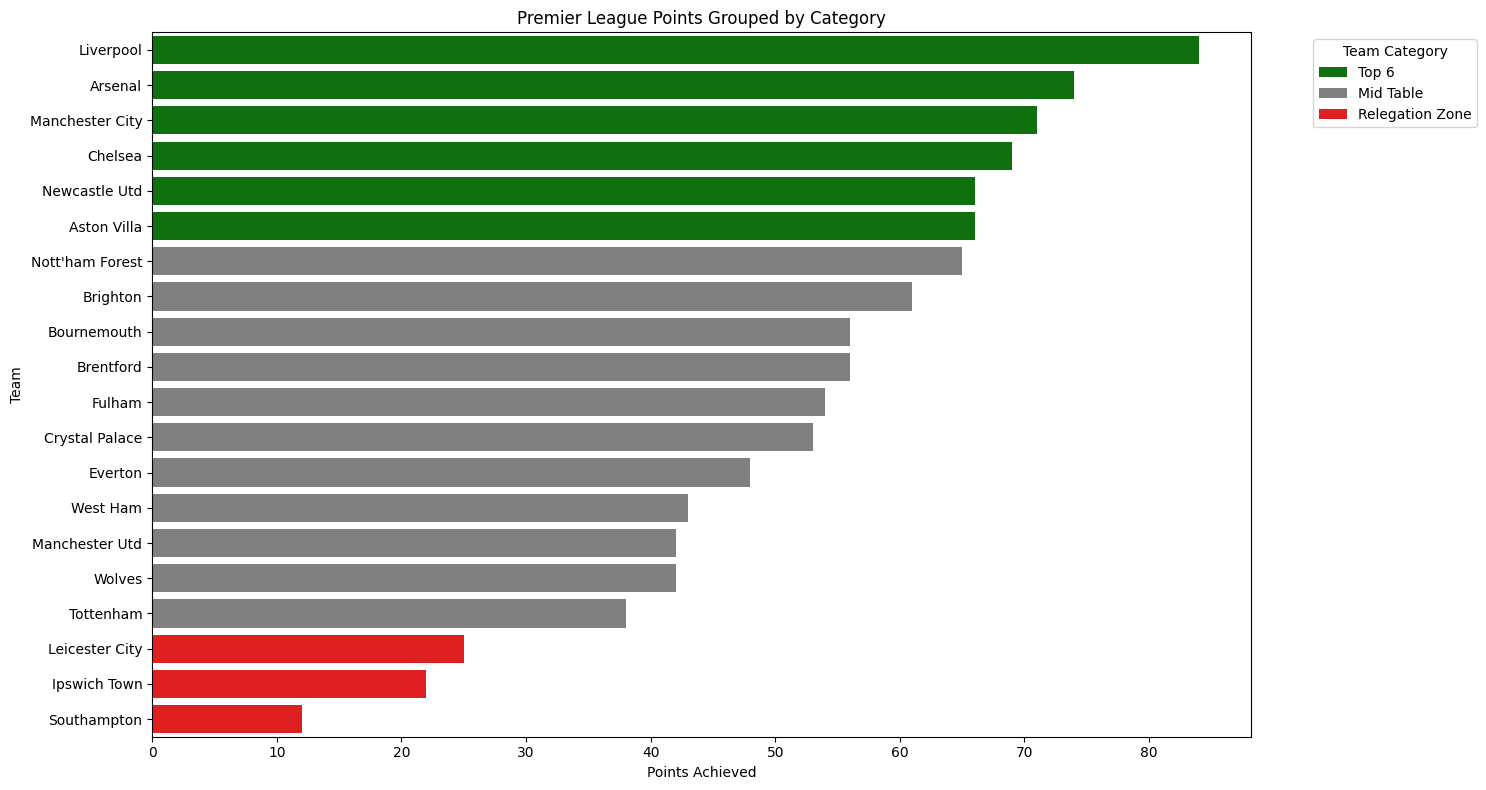

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data = df,
    x = 'Pts',
    y = 'Squad',
    hue = 'Category',
    dodge = False,
    palette = {'Top 6': 'green', 'Mid Table':'gray', 'Relegation Zone':'red'},
    orient = 'h'
)
plt.title('Premier League Points Grouped by Category')
plt.xlabel('Points Achieved')
plt.ylabel('Team')
plt.legend(title='Team Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();
#This shit looks amazing

  **2B: Bivariate analysis:**

  Correlation matrix (df.corr() + Seaborn heatmap)

  Scatter plots:
  
    xG vs GF (expected vs. actual goals)

    xGA vs GA (expected vs. actual goals conceded)

    Pts vs xGD (do teams with better expected goal diff have more points?)


***2B.1 #Correlation matrix (df.corr() + Seaborn heatmap)***

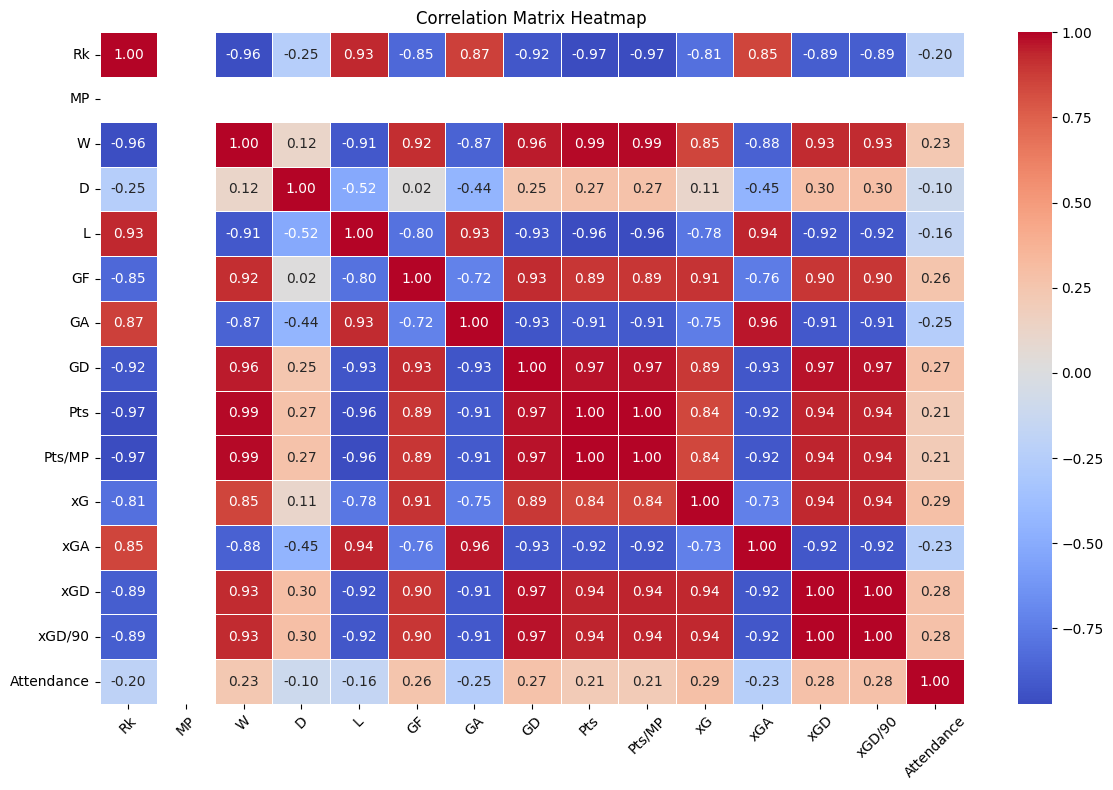

In [50]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt ='.2f',
    linewidths= 0.5,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

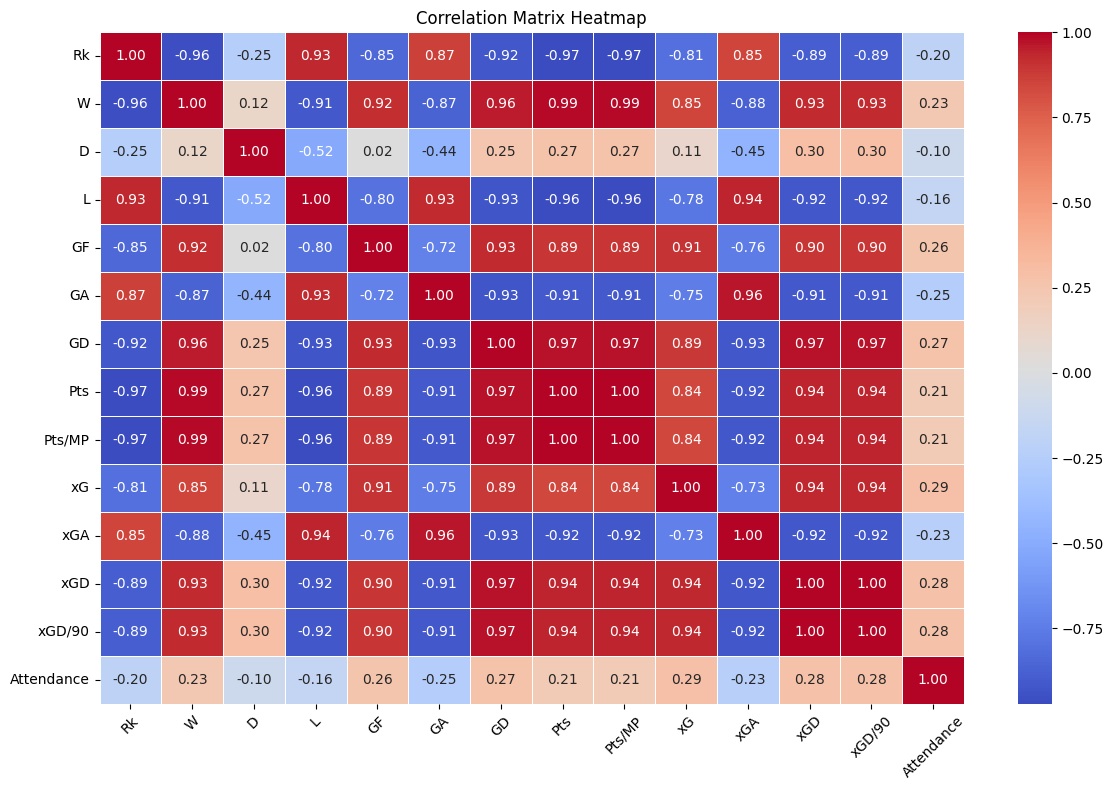

In [51]:
#Avoiding the MP white column by dropping it
corr_matrix = df.drop(columns=['MP']).corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt ='.2f',
    linewidths= 0.5,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Summary of the heatmap**

Each cell above shows correlation between two variables:

Color represents the magnitude and direction of the correlation.
```
  Red represents a strong positive correlation i.e. closer to 1
  Blue represents a strong negative correlation i.e closer to -1
  A reduction in the Shade of the colours Blue and Red show a decreasing association
  White-ish show weak or no correlation at all.
```


 ***Highlights***

 Points is closely related with

    Wins ---> 0.99 correlation
    GD, xGD, xGD/90, xG, GF, Pts/MP ---> are also above 0.9

   Take away -  Better performance leads to more points

    GF and xG: 0.93

   Teams with a higher expected goals tend to score more

 Rank is negatively correlated with:

    Pts: -0.97
    W: -0.96
    xGD, GD: all around -0.9

   Take_away - Lower rank means more wins and points, higher GD and so on.
  
  Attendance has a weak correlation with most performance metrics

    Highest is with xGD/90: ~0.28
    With Pts: ~0.21

   Takeaway - Higher game attendance by fans does not necessarily mean better performance.
   

**2B.2 Scatter plots:**

  xG vs GF (expected vs. actual goals)

  xGA vs GA (expected vs. actual goals conceded)

  Pts vs xGD (do teams with better expected goal diff have more points?)

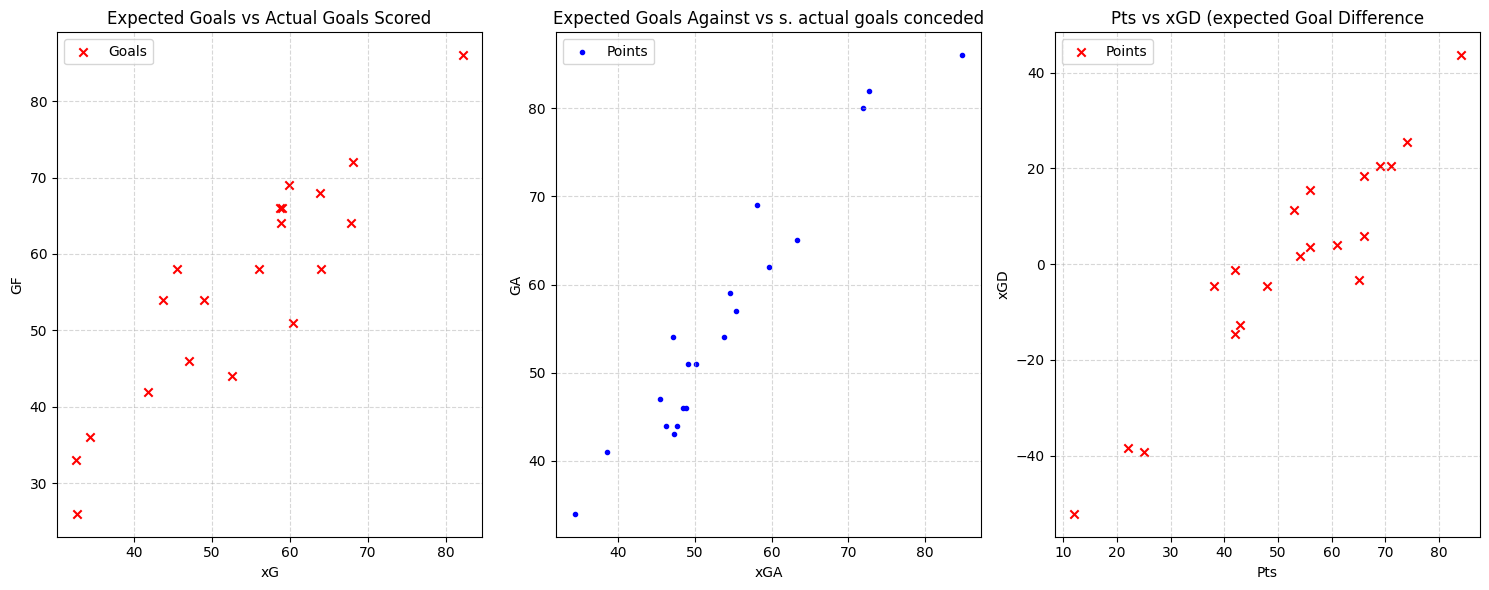

In [52]:

#Making three scatter plots
fig, ax = plt.subplots(1,3, figsize =(15,6))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

#xG vs GF (expected vs. actual goals)
ax1.scatter(df['xG'],df['GF'],label = 'Goals', color = 'red', marker = 'x')
ax1.set_title("Expected Goals vs Actual Goals Scored")
ax1.set_xlabel('xG')
ax1.set_ylabel('GF')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

#xGA vs GA (expected vs. actual goals conceded)
ax2.scatter(df['xGA'], df['GA'], label = 'Points', color = 'blue', marker ='.')
ax2.set_title('Expected Goals Against vs s. actual goals conceded')
ax2.set_xlabel('xGA')
ax2.set_ylabel('GA')
ax2.grid(True, linestyle = '--', alpha = 0.5)
ax2.legend()

#Pts vs xGD (do teams with better expected goal diff have more points?)
ax3.scatter(df['Pts'], df['xGD'], label = 'Points', color = 'red', marker ='x')
ax3.set_title('Pts vs xGD (expected Goal Difference')
ax3.set_xlabel('Pts')
ax3.set_ylabel('xGD')
ax3.grid(True, linestyle = '--', alpha = 0.5)
ax3.legend()

plt.tight_layout()


 **1. Expected Goals vs Actual Goals Scored (`xG` vs `GF`)**

- **Pattern**: Strong positive correlation — as expected goals (`xG`) increase, actual goals scored (`GF`) tend to increase.
- **Interpretation**: Teams are generally performing in line with expectations in terms of attacking output.
- **Outliers**: Some teams score more or fewer goals than expected

**2. Expected Goals Against vs Actual Goals Conceded (`xGA` vs `GA`)**

- **Pattern**: Also a strong positive correlation.
- **Interpretation**: Most teams are conceding roughly as expected; defensive performance aligns well with `xGA`.
- **Note**: Slight scatter may reveal over/underperforming defenses (e.g. strong goalkeeper effect or poor finishing from opponents).

**3. Points vs Expected Goal Difference (`Pts` vs `xGD`)**

- **Pattern**: Positive correlation — teams with higher expected goal differences (`xGD`) tend to earn more points.
- **Interpretation**: Reflects that goal difference based on expected data is a good indicator of overall team strength.
- **Insights**: Teams outperforming their `xGD` may be efficient or lucky; underperformers might lack finishing or composure under pressure.


# **2C: Team performance insights**

**Overperformers and underperformers: (GF - xG) and (GA - xGA)**

  *Will use a bar chart  to visualize which teams have outperformed or underperformed their expected stats on attack and defence*


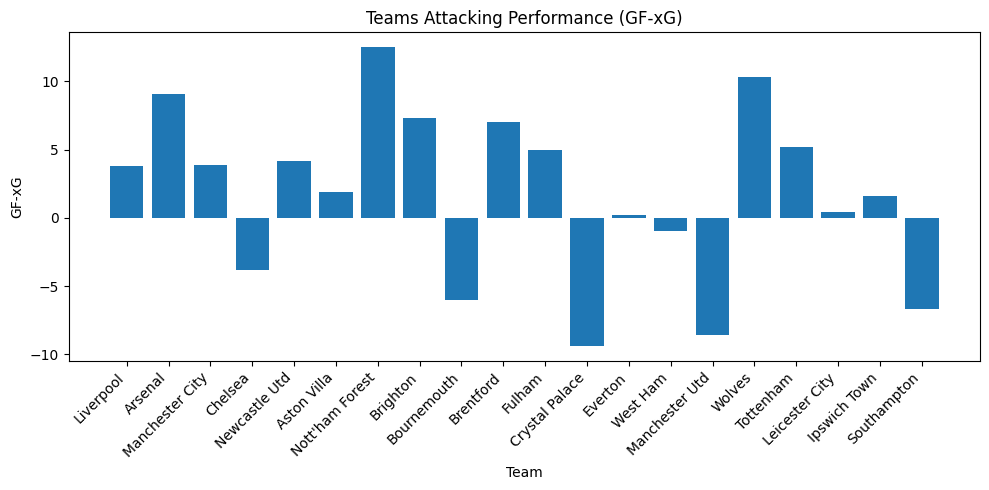

In [53]:
#Barchart of teams Gf-xG and GA-xGA
plt.figure(figsize =(10,5))
plt.bar(df['Squad'], df['GF']-df['xG'], label= 'Attacking')
plt.xlabel('Team')
plt.ylabel('GF-xG')
plt.title('Teams Attacking Performance (GF-xG)')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show();

**The bar chart clearly shows each team's attacking efficiency:**

Positive bars → overperforming (more goals than expected)

  Top performers include Arsenal (without a striker and more goals from
  midfilders and defenders (set piece specialists), Nottingham Forest
  (Suprise of the season as they picked more points than expected) and Wolves (Initially in the relegation battle but pulled themselves out)

Negative bars → underperforming (fewer goals than expected)
  
  The top underperformers include Chelsea (high profile wingers and attackers but apparently not clinical on goal), Manchester United (Big summer signings and new coach but few goals than expected) and Crystal Palace

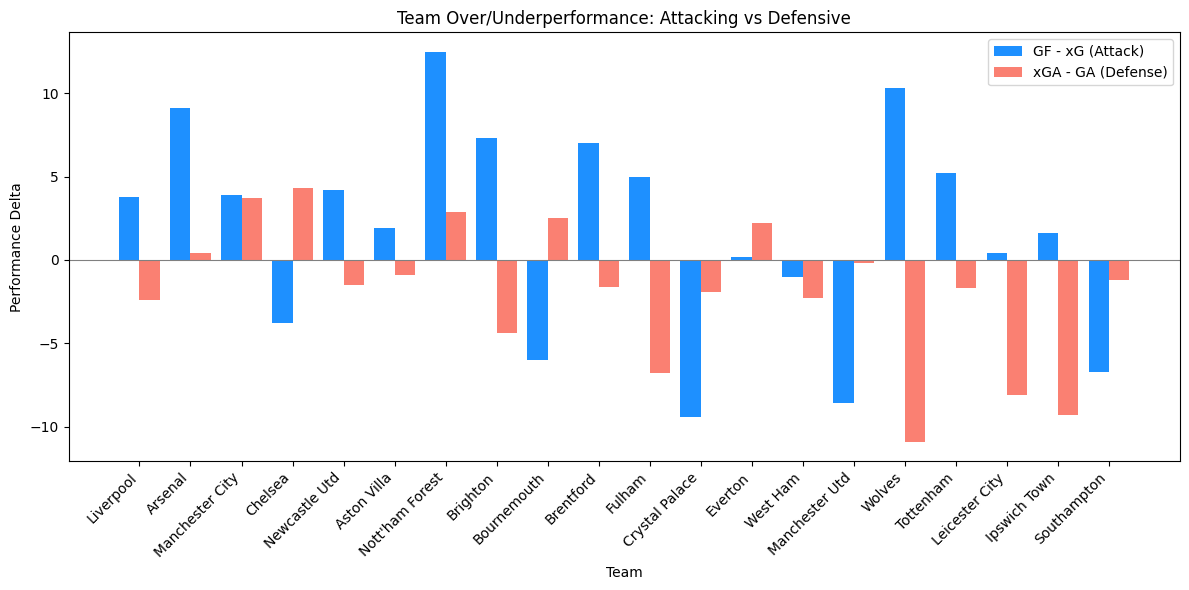

In [54]:
#Let us combine Above bar chart for attacking performance with Defensive performance
teams = df['Squad']
attack_pf = df['GF'] - df['xG']
defense_pf = df['xGA'] - df['GA'] # Reason for the inverse is that a positive means a better defense

#used for the label locations and bar width
x = np.arange(len(teams))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x-width/2, attack_pf, width, label = 'GF - xG (Attack)', color='dodgerblue')
bar2 = ax.bar(x+width/2, defense_pf, width, label='xGA - GA (Defense)', color='salmon')

#formatting
ax.set_xlabel('Team')
ax.set_ylabel('Performance Delta')
ax.set_title('Team Over/Underperformance: Attacking vs Defensive')
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.axhline(0, color='gray', linewidth=0.8)
ax.legend()

plt.tight_layout()
plt.show()

**Summary:**

**From the above combined visualization:**

  Teams with both graphs on the negative side show an under performance in both defense and attacking. Evident in Southampton , Manchester United, Westham and Crystal Palace.These teams scored fewer than expected and also conceded more than expected.

  Under defensive performance only was evident at Liverpool, Brighton, Fulham, Wolves, Leicester and Ipswich. These teams had decent attacking output but conceded more goals than expected.

  Manchester City and Nottinghan Forest had a good defensive and attacking performance. [Overperformed in both sides of the field]

  The top 5 teams in attacking over performance are Nottingham Forest, Wolves, Arsenal, Brighton and Brenford. These teams outperformed thier expected goals in scoring


# **Phase 3: Feature Engineering**
Goal: To create meaningful new metrics for deeper insights.

    We will create new meaningful new metrics for deeper insights

In [55]:
#Method 1
df['Goal Efficiency'] = df['GF']/df['xG']
df.shape # will be 20 by 21
#Method 2 for extending the data
df = df.assign(
    Defense_Efficiency = df['GA'] / df['xGA'],
    Performance_Delta = (df['GF'] - df['xG']) + (df['xGA'] - df['GA']),
    Win_Rate = df['W'] / df['MP'],
    Draw_Rate = df['D'] / df['MP'],
    Loss_Rate = df['L'] / df['MP'],
)
df.shape # should return 20 by 26

(20, 26)

In [56]:
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'Category', 'Goal Efficiency',
       'Defense_Efficiency', 'Performance_Delta', 'Win_Rate', 'Draw_Rate',
       'Loss_Rate'],
      dtype='object')

In [57]:
df.tail()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,Top Team Scorer,Goalkeeper,Notes,Category,Goal Efficiency,Defense_Efficiency,Performance_Delta,Win_Rate,Draw_Rate,Loss_Rate
15,16,Wolves,38,12,6,20,54,69,-15,42,...,Matheus Cunha - 15,José Sá,No notes,Mid Table,1.235698,1.187608,-0.6,0.315789,0.157895,0.526316
16,17,Tottenham,38,11,5,22,64,65,-1,38,...,Brennan Johnson - 11,Guglielmo Vicario,No notes,Mid Table,1.088435,1.026856,3.5,0.289474,0.131579,0.578947
17,18,Leicester City,38,6,7,25,33,80,-47,25,...,Jamie Vardy - 9,Mads Hermansen,Relegated,Relegation Zone,1.012270,1.112656,-7.7,0.157895,0.184211,0.657895
18,19,Ipswich Town,38,4,10,24,36,82,-46,22,...,Liam Delap - 12,Arijanet Muric,Relegated,Relegation Zone,1.046512,1.127923,-7.7,0.105263,0.263158,0.631579
19,20,Southampton,38,2,6,30,26,86,-60,12,...,Paul Onuachu - 4,Aaron Ramsdale,Relegated,Relegation Zone,0.795107,1.014151,-7.9,0.052632,0.157895,0.789474


# **Phase 4: Visualization & Storytelling**

 Visualizing the extended stats

 Plots to create:

1.   Bar plots:

     Top 5 teams by Goal Efficiency

     Top 7 teams, Peformance Delta/ Include notes
2.   Heatmap:

     Correlation matrix of extended features with select initial data

3.   Scatter plots:

     xG vs GF with overperformers labeled

4.   Line plot:

      Pts vs xGD

*4.1 Bar Plot*

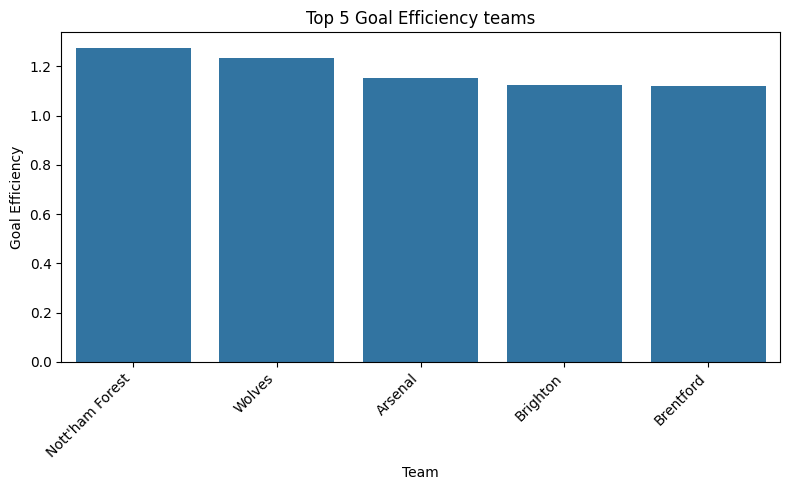

In [58]:
top5_df = df.sort_values(by='Goal Efficiency',ascending=False).head(5)

plt.figure(figsize = (8,5))
sns.barplot(data=top5_df, x=top5_df['Squad'], y =top5_df['Goal Efficiency'])
plt.xlabel('Team')
plt.ylabel('Goal Efficiency')
plt.title('Top 5 Goal Efficiency teams')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show();

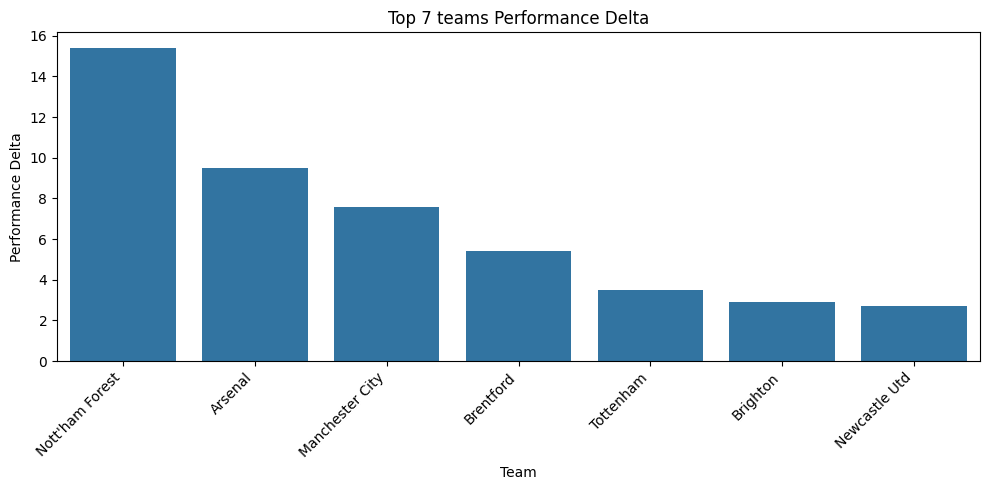

In [59]:
#Top 7 teams, Peformance Delta
top7_df = df.sort_values(by = 'Performance_Delta', ascending = False).head(7)
plt.figure(figsize=(10,5))
sns.barplot(data=top7_df, x='Squad', y = 'Performance_Delta')
plt.xlabel('Team')
plt.ylabel('Performance Delta')
plt.title('Top 7 teams Performance Delta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

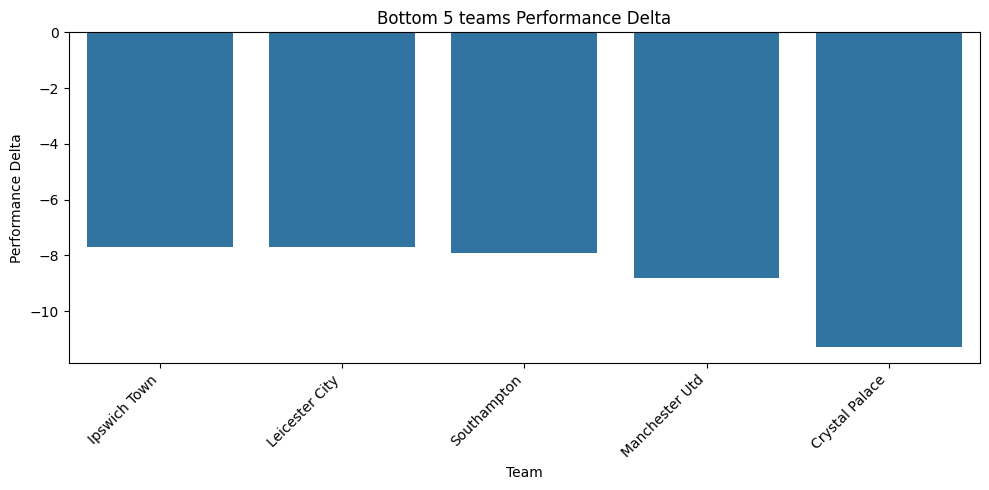

In [60]:
#Bottom 5 teams, Peformance Delta
top7_df = df.sort_values(by = 'Performance_Delta', ascending = False).tail(5)
plt.figure(figsize=(10,5))
sns.barplot(data=top7_df, x='Squad', y = 'Performance_Delta')
plt.xlabel('Team')
plt.ylabel('Performance Delta')
plt.title('Bottom 5 teams Performance Delta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***4.2 Heatmap:***

Correlation matrix of extended features with select initial data

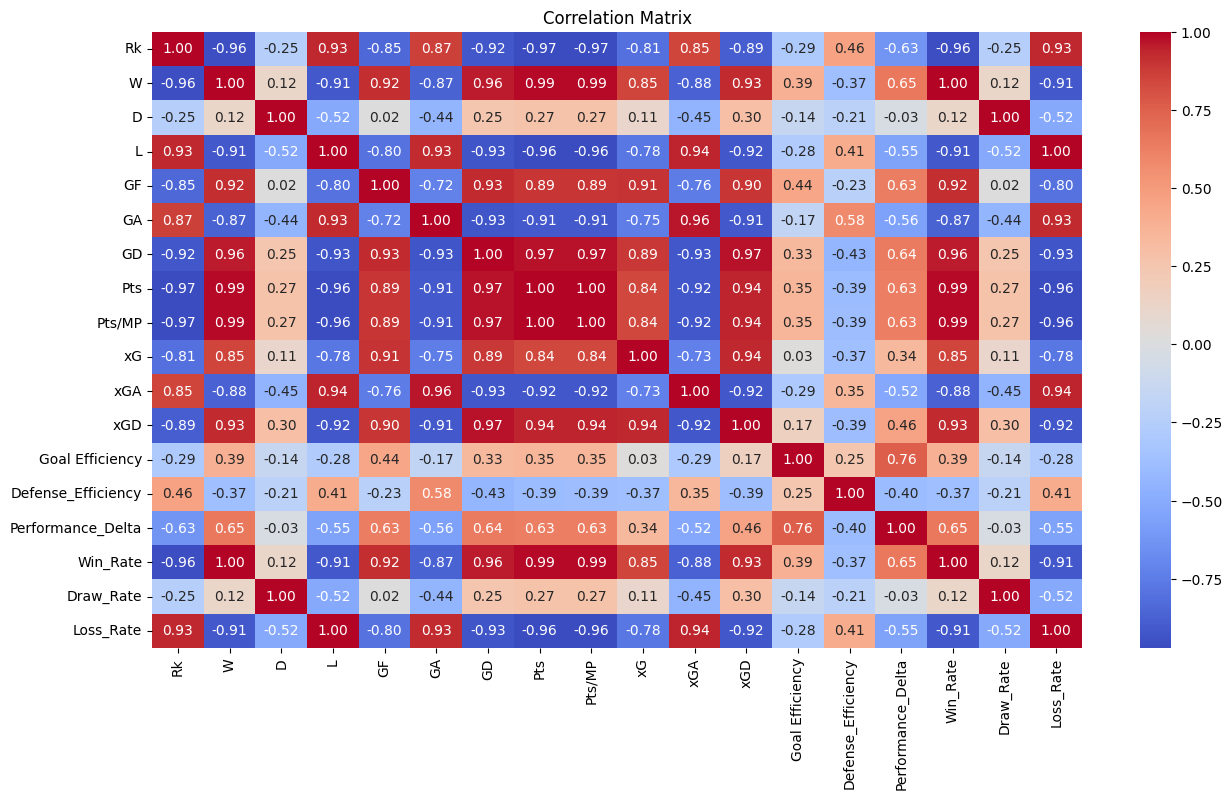

In [61]:
# first we create a list of the columns we want
selected_columns = ['Rk', 'Squad','W', 'D', 'L','GF', 'GA', 'GD', 'Pts', 'Pts/MP','xG', 'xGA', 'xGD','Notes', 'Category', 'Goal Efficiency',
       'Defense_Efficiency', 'Performance_Delta', 'Win_Rate', 'Draw_Rate',
       'Loss_Rate']
# then we create a new data frame
subset_df = df[selected_columns]
correl_matrix = subset_df.select_dtypes(include=['number']).corr()

plt.figure(figsize = (15,8))
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***4.3 Scatter plots:***

xG vs GF with with team category

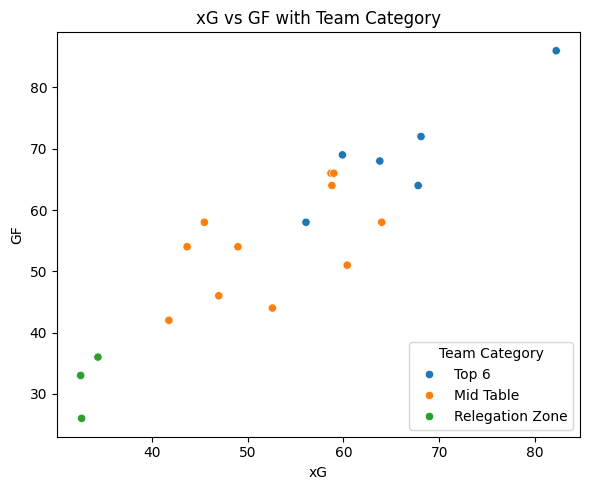

In [84]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = df, x = 'xG', y = 'GF', hue = 'Category')
plt.title("xG vs GF with Team Category")
plt.xlabel('xG')
plt.ylabel('GF')
plt.legend(title = 'Team Category', bbox_to_anchor=(1, 0.00), loc ='lower right')
plt.tight_layout()
plt.show();

**4.4 Line Plot:**

Pts vs xGD

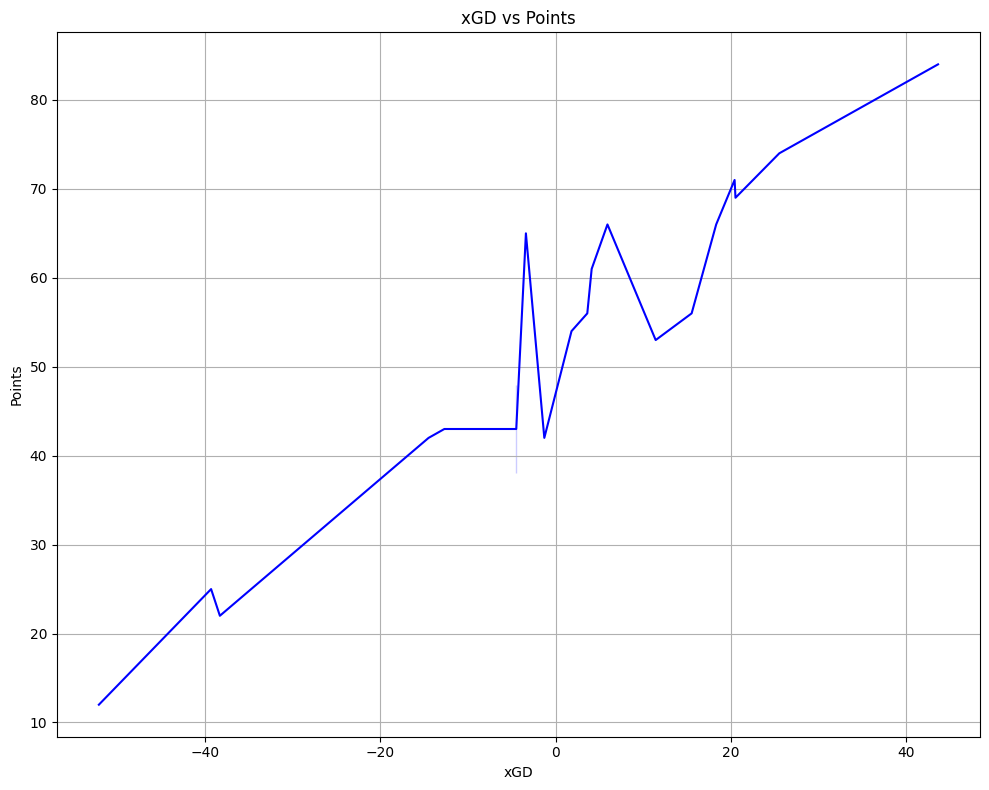

In [89]:
#Line plot
plt.figure(figsize = (10,8))
sns.lineplot(data = df, x = 'xGD', y = 'Pts', color = 'blue')
plt.title("xGD vs Points")
plt.xlabel('xGD')
plt.ylabel('Points')
plt.grid(True)
plt.tight_layout()
plt.show();

Exporting the data

In [90]:
df.to_csv('PL_data_final.csv', index=False)

# **Phase 5: Final Summary & Reporting**

**Key Highlights**


1.   Comparing xG (expected goals) to GF (actual goals scored) highlights which teams overperformed or underperformed in finishing.
 Overachievers: Teams scoring significantly more goals (above the scatter plot diagonal) than expected possibly due to elite finishing or favorable luck.
  Underachievers: Teams below the diagonal of the scatter plot created chances but failed to convert — often indicating inefficient attacking.

2.   Expected Goal Difference (xGD) is a calculated metric that balances attacking and defensive quality. When plotted against total points:
   There’s a strong positive relationship between xGD and points. This shows that teams with higher xGD tend to earn more points — supporting the idea that xGD is a reliable proxy for overall performance.


3.   One might expect high fan attendance to correlate with better results. To test this, we compared attendance with final points.

     There is no consistent correlation between attendance and performance. Some high-performing teams have modest crowd sizes, while others with large attendances underperformed.

     This suggests that while fan support matters culturally, it does not directly drive results on the pitch.

4.   This analysis confirms that advanced metrics like xG and xGD offer valuable insights into team performance. It also reveals that perceived factors like crowd size may not have a measurable impact on success.



